In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
h=0.001
min_t = 0.0
max_t = 3.0
n_points = int((max_t - min_t)/h)
t=linspace(min_t,max_t,n_points)
x_0 = 0
y_0 = 1
z_0 = 9


x = zeros(n_points)
y = zeros(n_points)
z = zeros(n_points)

sigma=10.0
rho=28.0
beta=8.0/3.0

def reset():
    global x
    global y
    global z
    x = zeros(n_points)
    y = zeros(n_points)
    z = zeros(n_points)
    
    x[0]=x_0
    y[0]=y_0
    z[0]=z_0
    
def xPrima(x,y,z):
    return (y-x)*sigma
def yPrima(x,y,z):
    return x*(rho-z)-y
def zPrima(x,y,z):
    return x*y-beta*z

In [48]:
reset()
for i in range(len(t)-1):
    xk1=h*xPrima(x[i],y[i],z[i])
    yk1=h*yPrima(x[i],y[i],z[i])
    zk1=h*zPrima(x[i],y[i],z[i])
    
    xk2=h*xPrima(x[i]+0.5*xk1,y[i]+0.5*yk1,z[i]+0.5*zk1)
    yk2=h*yPrima(x[i]+0.5*xk1,y[i]+0.5*yk1,z[i]+0.5*zk1)
    zk2=h*zPrima(x[i]+0.5*xk1,y[i]+0.5*yk1,z[i]+0.5*zk1)
    
    xk3=h*xPrima(x[i]+0.5*xk2,y[i]+0.5*yk2,z[i]+0.5*zk2)
    yk3=h*yPrima(x[i]+0.5*xk2,y[i]+0.5*yk2,z[i]+0.5*zk2)
    zk3=h*zPrima(x[i]+0.5*xk2,y[i]+0.5*yk2,z[i]+0.5*zk2)
    
    xk4=h*xPrima(x[i]+xk3,y[i]+yk3,z[i]+zk3)
    yk4=h*yPrima(x[i]+xk3,y[i]+yk3,z[i]+zk3)
    zk4=h*zPrima(x[i]+xk3,y[i]+yk3,z[i]+zk3)
    
    x[i+1]=x[i]+(xk1+2*xk2+2*xk3+xk4)/6.0
    y[i+1]=y[i]+(yk1+2*yk2+2*yk3+yk4)/6.0
    z[i+1]=z[i]+(zk1+2*zk2+2*zk3+zk4)/6.0

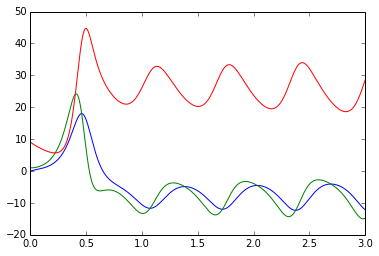

In [49]:
plot(t,x)
plot(t,y)
plot(t,z)

In [100]:
l=1.0
m=1.0
k=0.0
g=9.81
F=0.0
wd=10.0

h=0.001
min_t = 0.0
max_t = 3.0
n_points = int((max_t - min_t)/h)
t=linspace(min_t,max_t,n_points)
y0_0 = pi/16.0
y1_0 = 0.0

y0 = zeros(n_points)
y1 = zeros(n_points)

def reset2():
    global y0
    global y1
    y0 = zeros(n_points)
    y1 = zeros(n_points)
    
    y0[0]=y0_0
    y1[0]=y1_0
    
def Y0Prima(t,y0,y1):
    return y1
def Y1Prima(t,y0,y1):
    return -g/l*sin(y0)-k/m*y1+F/(m*l)*cos(wd*t)

In [101]:
def calcularTrayectoria():
    global y0,y1
    reset2()
    for i in range(len(t)-1):
        y0k1=h*Y0Prima(t[i],y0[i],y1[i])
        y1k1=h*Y1Prima(t[i],y0[i],y1[i])
    
        y0k2=h*Y0Prima(t[i]+0.5*h,y0[i]+0.5*y0k1,y1[i]+0.5*y1k1)
        y1k2=h*Y1Prima(t[i]+0.5*h,y0[i]+0.5*y0k1,y1[i]+0.5*y1k1)
        
        y0k3=h*Y0Prima(t[i]+0.5*h,y0[i]+0.5*y0k2,y1[i]+0.5*y1k2)
        y1k3=h*Y1Prima(t[i]+0.5*h,y0[i]+0.5*y0k2,y1[i]+0.5*y1k2)
    
        y0k4=h*Y0Prima(t[i]+h,y0[i]+y0k3,y1[i]+y1k3)
        y1k4=h*Y1Prima(t[i]+h,y0[i]+y0k3,y1[i]+y1k3)
    
        y0[i+1]=y0[i]+(y0k1+2*y0k2+2*y0k3+y0k4)/6.0
        y1[i+1]=y1[i]+(y1k1+2*y1k2+2*y1k3+y1k4)/6.0
        
    plot(t,y0,label="F="+str(F)+"N k= " + str(k)+"Ns/m")
    legend(loc=0)

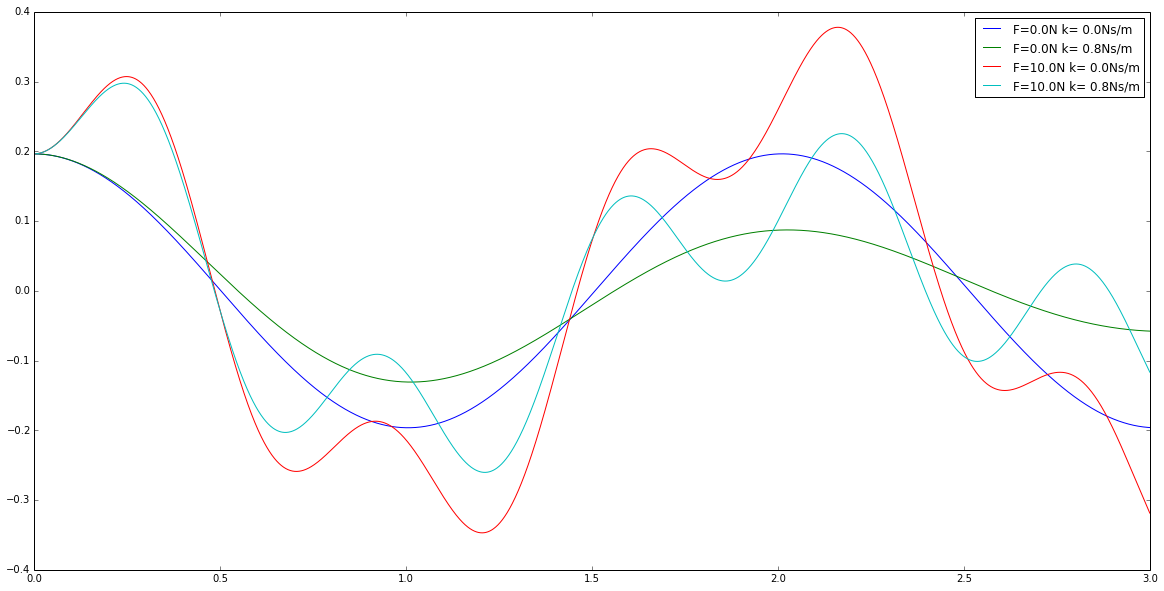

In [102]:
F=0.0
k=0.0
calcularTrayectoria()
k=0.8
calcularTrayectoria()
k=0.0
F=10.0
calcularTrayectoria()
k=0.8
calcularTrayectoria()
